## Задача. Множество с запросами суммы на отрезке

Реализуйте структуру данных для хранения множества целых чисел, поддерживающую запросы добавления, удаления, поиска, а также суммы на отрезке. На вход в данной задаче будет дана последовательность таких запросов. Чтобы гарантировать, что ваша программа обрабатывает каждый запрос по мере поступления (то есть онлайн), каждый запрос будет зависеть от результата выполнения одного из предыдущих запросов. Если бы такой зависимости не было, задачу можно было бы решить оффлайн: сначала прочитать весь вход и сохранить все запросы в каком-нибудь виде, а потом прочитать вход ещё раз, параллельно отвечая на запросы.  

Формат входа.   
Изначально множество пусто. Первая строка содержит число запросов n. Каждая из n следующих строк содержит запрос в одном из следующих четырёх форматов:  
• + i: добавить число f (i) в множество (если оно уже есть, проигнорировать запрос);  
• - i: удалить число f (i) из множества (если его нет, проигнорировать запрос);  
• ? i: проверить принадлежность числа f (i) множеству;  
• s l r: посчитать сумму всех элементов множества, попадающих в отрезок \[f (l), f (r)].  
Функция f определяется следующим образом. Пусть s — результат последнего запроса суммы на отрезке (если таких запросов ещё не было, то s = 0). Тогда  
    
    f (x) = (x + s) mod 1 000 000 001

Формат выхода.  
Для каждого запроса типа ? i выведите «Found» или «Not found». Для каждого запроса суммы выведите сумму всех элементов множества, попадающих в отрезок \[f (l), f (r)]. Гарантируется, что во всех тестах f (l) ≤ f (r).

Ограничения.  
1 ≤ n ≤ 10^5 ; 0 ≤ i ≤ 10^9.

# Runner

In [7]:
import sys

def run(tree, input=sys.stdin, output=sys.stdout, trace=False, nodefunc=False, **settings):
    reader = lambda: next(input)
    find = lambda key: output.write("Found\n" if T.find(key) != None else "Not found\n")
    summ = lambda l, r: output.write(str(T.summ(l, r)) + '\n')  
    T = tree(**settings)
    n = int(reader())
    commands = {'+': T.add, '?': find, '-': T.remove, 's': summ}
    for _ in range(n):
        cmd, *args = reader().split()
        args = list(map(T.bormuliator, map(int, args)))
        commands[cmd](*args)
        if trace:
            print("acc:{} <- ({} {})".format(T.accumulator, cmd, args))
        if nodefunc:
            T.display(nodefunc)
    return T

# Tester

In [11]:
import random

COMMANDS = ['+', '?', '-', 's']

class TestCases():
    def __init__(self, n, mode=0):
        self.n = n
        self.MOD = 10 ** 9 + 1
        self.cases = [k + (0 if random.random() > 0.5 else 1) for k in range(n)]     # одинаковых в среднем 0.5*n
        for i in range(n//20):                                              
            a, b = random.randint(0,n - 1), random.randint(0,n - 1)
            self.cases[a], self.cases[b] = self.cases[b], self.cases[a]              # неупорядочено в среднем 0.05 * n
            self.cases[random.randint(0,n - 1)] += self.MOD                          # превышают модуль в среднем 0.05 * n
        if mode == -1:
            self.cases.reverse()
        elif mode == 0:
            random.shuffle(self.cases)
        
        ws = [50, 10, 10, 35]
        ws = [round(n * x / 100) for x in ws]
        self.operations = ['+'] * ws[0] + ['?'] * ws[1] + ['-'] * ws[2] 
        self.operations = self.operations + ['s'] * (n - len(self.operations))
        random.shuffle(self.operations)
         
    def stream(self):
        def choose(k):
            l = random.randint(0,k//4)
            r = random.randint(l,k) if (l != k) else l
            return (self.cases[l], self.cases[r]) if self.cases[l] % self.MOD <=self.cases[r] % self.MOD else (self.cases[r], self.cases[l])

        yield str(self.n) + '\n'
        for i, cmd in enumerate(zip(self.operations, self.cases)):
            if cmd[0] == 's': arg = choose(i)
            elif cmd[0] == '?': arg = (choose(i)[0], )
            else: arg = (cmd[1],)
            command = (cmd[0],) + arg
            yield ' '.join(list(map(str, command))) + '\n'

# Checker

In [12]:
from io import StringIO

def check_reference(tree, n=1000, **settings):
    for _ in range(5):
        out, out1 = StringIO(), StringIO()
        cases = [*TestCases(n, mode=0).stream()]
        test_gen, tests_gen1 = (c for c in cases), (c for c in cases)
        tref = run(BSTList, input=test_gen, output=out, **settings)
        t = run(tree, input=tests_gen1, output=out1, **settings)
        # assert out.getvalue() == out1.getvalue()
        out, out1 = out.getvalue(), out1.getvalue()
        if out != out1:
            print(repr(''.join(cases)))
            print(tref)
            t.tree.display()
            return False
    return True

# Отрисовка (stackoverflow)

In [13]:
class Drawer():
    def display(self, nfunc=lambda x: x.key):
        if self:
            lines, *_ = self._display_aux(nfunc)
            for line in lines:
                print(line)

    def _display_aux(self, nfunc):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.node.right.node is None and self.node.left.node is None:
            line = '%s' % nfunc(self.node)
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.node.right.node is None:
            lines, n, p, x = self.node.left._display_aux(nfunc)
            s = '%s' % nfunc(self.node)
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.node.left.node is None:
            lines, n, p, x = self.node.right._display_aux(nfunc)
            s = '%s' % nfunc(self.node)
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.node.left._display_aux(nfunc)
        right, m, q, y = self.node.right._display_aux(nfunc)
        s = '%s' % nfunc(self.node)
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2

# Двоичное дерево поиска (на списке). Референсный вариант
Дошло до теста #59

In [14]:
class NodeL():
    __slots__ = ['key', 'parent', 'left', 'right']

    def __init__(self, key, parent=-1):
        self.parent = parent
        self.left = self.right = -1
        self.key = key

    def __repr__(self):
        if self.left == self.right == -1:
            return str(self.key)
        else:
            return "{}({},{})".format(self.key, self.left or '', self.right or '')
        # return "{}:{}({},{})".format(self.key, self.parent, self.left, self.right)

class BSTList(list):
    __slots__ = ['accumulator', 'bormuliator', 'free_idx']

    def __init__(self, **settings):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.free_idx = list()

    def __bool__(self):
        if not any(self) and len(self) > 0:
            self.clear()
            self.free_idx.clear()
        return True if any(self) else False

    def _push(self, key, node):
        idx = len(self)
        if self.free_idx: 
            idx = self.free_idx.pop()
            self[idx] = NodeL(key, parent=node)
        else: 
            self.append(NodeL(key, parent=node))
        return idx

    def find(self, key, node=0):
        if self:
            while node != -1:
                if key < self[node].key:
                    node = self[node].left
                elif key > self[node].key:
                    node = self[node].right
                else:
                    return node

    def add(self, key, node=0):
        if not self:
            self.append(NodeL(key))
        else:
            while node != -1:
                if key < self[node].key:
                    if self[node].left == -1:
                        self[node].left = self._push(key, node)
                    node = self[node].left
                elif key > self[node].key:
                    if self[node].right == -1:
                        self[node].right = self._push(key, node)
                    node = self[node].right
                else:
                    return    

    def infix_walk(self, node=0, func=None):
        if not func: func = lambda i: self[i].key
        if self:
            stack = list()
            while stack or node != -1:
                if stack:
                    node = stack.pop()
                    yield func(node)
                    node = self[node].right
                while node != -1:
                    stack.append(node)
                    node = self[node].left
    
    def summ(self, l, r):
        self.accumulator = sum([x for x in self.infix_walk() if l <= x <= r])
        return self.accumulator

    def remove(self, key, node=0):
        node = self.find(key)
        if node != None:
            if self[node].left == -1 and self[node].right == -1:    # нет потомков
                if self[node].parent != -1:
                    if self[self[node].parent].left == node:
                        self[self[node].parent].left = -1
                    else:
                        self[self[node].parent].right = -1
                self[node] = None
                self.free_idx.append(node)
            elif self[node].left * self[node].right < 0:            # один потомок
                c = self[node].right if (self[node].left == -1) else self[node].left
                self[node].key = self[c].key 
                self[node].left = self[c].left 
                self[node].right = self[c].right
                if self[c].left != -1: self[self[c].left].parent = self[c].parent
                if self[c].right != -1: self[self[c].right].parent = self[c].parent
                self[c] = None
                self.free_idx.append(c)
            else:                                                   # два потомка
                r_min = next(self.infix_walk(node=self[node].right, func=lambda x: x))
                self[node].key = self[r_min].key
                if self[r_min].right != -1:                                     # если было правое п.д.
                    if self[r_min].parent == node:
                        self[self[r_min].parent].right = self[r_min].right      # у rmin м.б. только пр. потомок
                    else:
                        self[self[r_min].parent].left = self[r_min].right
                    self[self[r_min].right].parent = self[r_min].parent
                if self[r_min].left == -1 and self[r_min].right == -1:          # ... если не было
                    if self[r_min].parent == node:                              # rmin справа от родителя только если родитель и есть удаляемый
                        self[self[r_min].parent].right = -1                     
                    else:
                        self[self[r_min].parent].left = -1
                self[r_min] = None
                self.free_idx.append(r_min)

SAMPLE = "15\n? 1\n+ 1\n? 1\n+ 2\ns 1 2\n+ 1000000000\n? 1000000000\n- 1000000000\n? 1000000000\ns 999999999 1000000000\n- 2\n? 2\n- 0\n+ 9\ns 0 9"          
_ = run(BSTList, input=(x for x in SAMPLE.split('\n')))

Not found
Found
3
Found
Not found
1
Not found
10


# Двоичное дерево поиска (на ссылках)
На ~20% быстрее, чем на списке. Итеративно можно только обходить, изменения узлов только рекурсивно (или неочевидно как иначе).

In [15]:
class NodeBST: 
    __slots__ = ['key', 'left', 'right']

    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
    
    def __repr__(self):
        return "{}({},{})".format(self.key, self.left or '', self.right or '')

class BSTree(Drawer): 
    __slots__ = ['node']

    def __init__(self):
        self.node = None

    def __repr__(self):
        return repr(self.node)

    def fmin(self, node=None):
        if node is None: node = self.node
        while node:
            if node.left.node is None:
                return node
            node = node.left.node

    def fmax(self, node=None):
        if node is None: node = self.node
        while node:
            if node.right.node is None:
                return node
            node = node.right.node

    def add(self, key):
        node = self.node
        if node is None:
            self.node = NodeBST(key) 
            self.node.left = BSTree() 
            self.node.right = BSTree()        
        elif key < node.key: 
            self.node.left.add(key)
        elif key > node.key: 
            self.node.right.add(key)            

    def remove(self, key):
        if self.node != None: 
            if self.node.key == key: 
                if (self.node.left.node is None) and (self.node.right.node is None):     # потомков нет
                    self.node = None
                elif self.node.left.node is None:                           # один потомок: подтянуть справа
                    self.node = self.node.right.node
                elif self.node.right.node is None:                          # один потомок: подтянуть слева
                    self.node = self.node.left.node
                else:                                                       # два потомка
                    right_min = self.fmin(self.node.right.node)
                    self.node.key = right_min.key 
                    self.node.right.remove(right_min.key)                   # теперь у того уже будет 1 потомок
                return  
            elif key < self.node.key: 
                self.node.left.remove(key)  
            elif key > self.node.key: 
                self.node.right.remove(key)

class SummatorBST:
    __slots__ = ['accumulator', 'bormuliator', 'tree', 'usesplit']

    def __init__(self, usesplit=False):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.tree = BSTree()
        self.usesplit = usesplit

    def add(self, *args):
        self.tree.add(*args)
    
    def remove(self, *args):
        self.tree.remove(*args)
    
    def display(self, *args):
        self.tree.display(*args)

    def find(self, key):
        node = self.tree.node
        while node is not None:
            if key < node.key:
                node = node.left.node
            elif key > node.key:
                node = node.right.node
            else:
                return node 

    def split(self, key):
        return self._split(self.tree, key)
    
    def merge_w_root(self, t1, t2, t):
        return self._merge_w_root(t1, t2, t)

    def merge(self, t1, t2):
        if t1 is None:
            return
        if t2 is None:
            return
        else:
            node = t1.fmax()
            t = BSTree()
            t.node = node
            t1.remove(node.key)
            self.tree = self._merge_w_root(t1, t2, t)

    def _merge_w_root(self, t1, t2, t):
        t.node.left = t1 if t1 != None else BSTree()
        t.node.right = t2 if t2 != None else BSTree()
        return t

    def _split(self, t, key):
        if t.node is None:
            return None, None 
        if key < t.node.key:
            t1, t2 = self._split(t.node.left, key)
            t2x = self._merge_w_root(t2, t.node.right, t)
            return t1, t2x
        else:
            t1, t2 = self._split(t.node.right, key)
            t1x = self._merge_w_root(t.node.left, t1, t)
            return t1x, t2

    def in_walk(self, tree):
        if tree is not None:
            node = tree.node
            stack = list()
            while stack or node:
                if stack:
                    node = stack.pop()
                    yield node.key
                    node = node.right.node
                while node is not None:
                    stack.append(node)
                    node = node.left.node
    
    def summ_summ(self, l, r):
        self.accumulator = sum(x for x in self.in_walk(self.tree) if l <= x <= r)
        return self.accumulator  

    def summ_split(self, l, r): # чувствительна к l > r
        le, gr = self.split(l-1)
        l1 = sum(x for x in self.in_walk(le))
        self.merge(le, gr)
        le, gr = self.split(r)
        r1 = sum(x for x in self.in_walk(le))
        self.merge(le, gr)

        self.accumulator = r1 - l1
        return self.accumulator  
    
    def summ(self, l, r):
        return self.summ_split(l, r) if self.usesplit else self.summ_summ(l, r)

check_reference(SummatorBST), check_reference(SummatorBST, usesplit=True)

(True, True)

# ... с поддержкой суммы

In [16]:
class NodeBSTsum: 
    __slots__ = ['key', 'sum', 'left', 'right']

    def __init__(self, key):
        self.key = key
        self.sum = key
        self.left = None
        self.right = None
    
    def __repr__(self):
        return "{}({},{})".format(self.key, self.left or '', self.right or '')

class BSTreeSum(Drawer): 
    __slots__ = ['node']

    def __init__(self):
        self.node = None

    def __repr__(self):
        return repr(self.node)

    def fmin(self, node=None):
        if node is None: node = self.node
        while node:
            if node.left.node == None:
                return node
            node = node.left.node

    def fmax(self, node=None):
        if node is None: node = self.node
        while node:
            if node.right.node == None:
                return node
            node = node.right.node

    def add(self, key):
        node = self.node
        if node is None:
            self.node = NodeBSTsum(key) 
            self.node.left = BSTreeSum() 
            self.node.right = BSTreeSum()        
        elif key < node.key: 
            self.node.left.add(key)
        elif key > node.key: 
            self.node.right.add(key)   
        self.update()         

    def remove(self, key):
        if self.node is not None: 
            if self.node.key == key: 
                if self.node.left.node == self.node.right.node == None:     # потомков нет
                    self.node = None
                elif self.node.left.node == None:                           # один потомок: подтянуть справа
                    self.node = self.node.right.node
                elif self.node.right.node == None:                          # один потомок: подтянуть слева
                    self.node = self.node.left.node
                else:                                                       # два потомка
                    right_min = self.fmin(self.node.right.node)
                    self.node.key = right_min.key 
                    self.node.right.remove(right_min.key)                   # теперь у того уже будет 1 потомок
                    self.update()
                return  
            elif key < self.node.key: 
                self.node.left.remove(key)  
                self.update()
            elif key > self.node.key: 
                self.node.right.remove(key)
                self.update()

    def update(self):
        if self.node: 
            self.node.sum = self.node.key + (self.node.left.node.sum if self.node.left.node else 0) + \
                                            (self.node.right.node.sum if self.node.right.node else 0)


class SummatorBSTsum:
    __slots__ = ['accumulator', 'bormuliator', 'tree']

    def __init__(self, usesplit=False):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.tree = BSTreeSum()

    def add(self, *args):
        self.tree.add(*args)
    
    def remove(self, *args):
        self.tree.remove(*args)
    
    def display(self, *args):
        self.tree.display(*args)

    def find(self, key):
        node = self.tree.node
        while node:
            if key < node.key:
                node = node.left.node
            elif key > node.key:
                node = node.right.node
            else:
                return node 
   
    def less_or_equal(self, key):
        node = self.tree.node
        S = node.sum if (node != None) else 0
        while node is not None:                
            if key < node.key:
                S = S - (node.right.node.sum if (node.right.node != None) else 0)
                S = S - node.key
                node = node.left.node
            else:
                node = node.right.node
        return S

    def summ(self, l, r):
        leleft = self.less_or_equal(l - 1)
        leright = self.less_or_equal(r)
        if leright < leleft: leright = leleft                              # чувствительно к l > r
        self.accumulator = leright - leleft
        return self.accumulator  

check_reference(SummatorBSTsum)

True

# АВЛ-дерево с поддержкой разрезания, склейки

Плохо... В 2 раз медленнее полнго обхода, в 20 раз медленнее АВЛ-дерева с суммой.

In [18]:
class NodeAVL:
    __slots__ = ['key', 'sum', 'size', 'left', 'right']

    def __init__(self, key):
        self.key = key
        self.sum = key
        self.size = 1
        self.left = None
        self.right = None
    
    def __repr__(self):
        return "{}({},{})".format(self.key, self.left or '', self.right or '')

class AVLTreeS(Drawer):
    __slots__ = ['node', 'height', 'balance']

    def __init__(self):
        self.node = None
        self.height = -1
        self.balance = 0

    def __repr__(self):
        return repr(self.node)

    def fmin(self, node=None):
        if node is None: node = self.node
        while node:
            if node.left.node == None:
                return node
            node = node.left.node

    def fmax(self, node=None):
        if node is None: node = self.node
        while node:
            if node.right.node == None:
                return node
            node = node.right.node

    def add(self, key):
        node = self.node
        if node is None:
            self.node = NodeAVL(key) 
            self.node.left = AVLTreeS() 
            self.node.right = AVLTreeS()        
        elif key < node.key:
            self.node.left.add(key)
        elif key > node.key: 
            self.node.right.add(key)  
        self.rebalance()                                                    # каждое поддерево при выходе из рекурсии

    def rebalance(self):
        self.update(False)
        while self.balance < -1 or self.balance > 1: 
            if self.balance > 1:
                if self.node.left.balance < 0:  
                    self.node.left.lrotate() # we're in case II
                    self.update()
                self.rrotate()
                self.update()
                
            if self.balance < -1:
                if self.node.right.balance > 0:  
                    self.node.right.rrotate() # we're in case III
                    self.update()
                self.lrotate()
                self.update()

    def update(self, recurse=True):
        if self.node is not None: 
            if recurse: 
                if self.node.left: 
                    self.node.left.update()
                if self.node.right:
                    self.node.right.update()
            self.height = max(self.node.left.height,
                              self.node.right.height) + 1 
            self.balance = self.node.left.height - self.node.right.height
            self.node.sum = self.node.key + (self.node.left.node.sum if self.node.left.node else 0) + \
                                            (self.node.right.node.sum if self.node.right.node else 0)
            self.node.size = 1 + (self.node.left.node.size if self.node.left.node else 0) + \
                                 (self.node.right.node.size if self.node.right.node else 0)
        else: 
            self.height = -1 
            self.balance = 0

    def rrotate(self):
        # Rotate right pivoting on self 
        A = self.node 
        B = self.node.left.node 
        T = B.right.node 
        
        self.node = B 
        B.right.node = A 
        A.left.node = T 
    
    def lrotate(self):
        # Rotate left pivoting on self 
        A = self.node 
        B = self.node.right.node 
        T = B.left.node 
        
        self.node = B 
        B.left.node = A 
        A.right.node = T 

    def remove(self, key):
        if self.node is not None: 
            if self.node.key == key: 
                if (self.node.left.node is None) and (self.node.right.node is None):     # потомков нет
                    self.node = None
                elif self.node.left.node is None:                           # один потомок: подтянуть справа
                    self.node = self.node.right.node
                elif self.node.right.node is None:                          # один потомок: подтянуть слева
                    self.node = self.node.left.node
                else:                                                       # два потомка
                    right_min = self.fmin(self.node.right.node)
                    self.node.key = right_min.key 
                    self.node.right.remove(right_min.key)                   # теперь у того уже будет 1 потомок
                self.rebalance()
                return  
            elif key < self.node.key: 
                self.node.left.remove(key)  
            elif key > self.node.key: 
                self.node.right.remove(key)
            self.rebalance()                                                # каждое поддерево при выходе из рекурсии
    
    def order_statistics(self, k):  # 1-based
        if (self.node is None) or (k < 1) or (k > self.node.size):
            return
        leftsize = self.node.left.node.size if self.node.left.node else 0
        if k == leftsize + 1:
            return self.node.key
        if k < leftsize + 1:
            return self.node.left.order_statistics(k)
        else:
            return self.node.right.order_statistics(k - leftsize - 1)

class SplitterAVL:
    __slots__ = ['accumulator', 'bormuliator', 'T']

    def __init__(self, usesplit=False):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.T = [AVLTreeS(), AVLTreeS(), AVLTreeS()]

    def add(self, *args):
        self.T[0].add(*args)

    def remove(self, *args):
        self.T[0].remove(*args)
    
    def display(self, i=0, **kwargs):
        self.T[i].display(**kwargs)

    def find(self, key):
        node = self.T[0].node
        while node:
            if key < node.key:
                node = node.left.node
            elif key > node.key:
                node = node.right.node
            else:
                return node

    def _merge_w_root(self, t1, t2, t):
        t.node.left = t1 if t1 else AVLTreeS()
        t.node.right = t2 if t2 else AVLTreeS()
        return t

    def _avl_merge_w_root(self, t1, t2, t):
        t1h = t1.height if t1 else -1
        t2h = t2.height if t2 else -1
        if abs(t1h - t2h) <= 1:
            t = self._merge_w_root(t1, t2, t)
            t.update(False)
            return t
        elif t1h > t2h:
            Tx = self._avl_merge_w_root(t1.node.right, t2, t)
            t1.node.right = Tx
            t1.rebalance()
            return t1
        else:
            Tx = self._avl_merge_w_root(t1, t2.node.left, t)
            t2.node.left = Tx
            t2.rebalance()
            return t2

    def avl_split(self, t, key):
        if t.node is None:
            return AVLTreeS(), AVLTreeS()
        if key < t.node.key:
            t1, t2 = self.avl_split(t.node.left, key)
            t2x = self._avl_merge_w_root(t2, t.node.right, t)
            return t1, t2x
        else:
            t1, t2 = self.avl_split(t.node.right, key)
            t1x = self._avl_merge_w_root(t.node.left, t1, t)
            return t1x, t2
    
    def avl_merge(self, t1, t2):
         t = AVLTreeS()
         node = t1.fmax()
         t1.remove(node.key)
         t.node = node
         return self._avl_merge_w_root(t1, t2, t)

    def summ(self, l, r):  
        # tri-split            
        if self.T[0].node:
            self.T[0], self.T[1] = self.avl_split(self.T[0], l-1)
        if self.T[1].node:
            self.T[1], self.T[2] = self.avl_split(self.T[1], r)  
        
        S = self.T[1].node.sum if self.T[1].node != None else 0
        
        # tri-merge
        if not self.T[1].node:
            self.T[1], self.T[2] = self.T[2], self.T[1]
        else:
            self.T[1] = self.avl_merge(self.T[1], self.T[2])
            self.T[2] = AVLTreeS()
        if not self.T[0].node:
            self.T[0], self.T[1] = self.T[1], self.T[0]
        else:
            self.T[0] = self.avl_merge(self.T[0], self.T[1])
            self.T[1] = AVLTreeS()

        self.accumulator = S
        return self.accumulator 

# import cProfile
# cProfile.run('run(SplitterAVL, input=TestCases(1000, mode=0).stream(), output=StringIO())', sort=1)

check_reference(SplitterAVL)

True

In [9]:
class NodeAVL:
    __slots__ = ['key', 'sum', 'size', 'left', 'right']

    def __init__(self, key):
        self.key = key
        self.sum = key
        self.size = 1
        self.left = None
        self.right = None
    
    def __repr__(self):
        return "{}({},{})".format(self.key, self.left or '', self.right or '')

class AVLTreeS(Drawer):
    __slots__ = ['node', 'height', 'balance']

    def __init__(self):
        self.node = None
        self.height = -1
        self.balance = 0

    def __repr__(self):
        return repr(self.node)

    def fmin(self, node=None):
        if node is None: node = self.node
        while node:
            if node.left.node == None:
                return node
            node = node.left.node

    def fmax(self, node=None):
        if node is None: node = self.node
        while node:
            if node.right.node == None:
                return node
            node = node.right.node

    def add(self, key):
        node = self.node
        if node == None:
            self.node = NodeAVL(key) 
            self.node.left = AVLTreeS() 
            self.node.right = AVLTreeS()        
        elif key < node.key:
            self.node.left.add(key)
        elif key > node.key: 
            self.node.right.add(key)  
        self.rebalance()                                                    # каждое поддерево при выходе из рекурсии

    def rebalance(self):
        self.update(False)
        while self.balance < -1 or self.balance > 1: 
            if self.balance > 1:
                if self.node.left.balance < 0:  
                    self.node.left.lrotate() # we're in case II
                    self.update()
                self.rrotate()
                self.update()
                
            if self.balance < -1:
                if self.node.right.balance > 0:  
                    self.node.right.rrotate() # we're in case III
                    self.update()
                self.lrotate()
                self.update()

    def update(self, recurse=True):
        if self.node: 
            if recurse: 
                if self.node.left: 
                    self.node.left.update()
                if self.node.right:
                    self.node.right.update()
            self.height = max(self.node.left.height,
                              self.node.right.height) + 1 
            self.balance = self.node.left.height - self.node.right.height
            self.node.sum = self.node.key + (self.node.left.node.sum if self.node.left.node else 0) + \
                                            (self.node.right.node.sum if self.node.right.node else 0)
            self.node.size = 1 + (self.node.left.node.size if self.node.left.node else 0) + \
                                 (self.node.right.node.size if self.node.right.node else 0)
        else: 
            self.height = -1 
            self.balance = 0

    def rrotate(self):
        # Rotate right pivoting on self 
        A = self.node 
        B = self.node.left.node 
        T = B.right.node 
        
        self.node = B 
        B.right.node = A 
        A.left.node = T 
    
    def lrotate(self):
        # Rotate left pivoting on self 
        A = self.node 
        B = self.node.right.node 
        T = B.left.node 
        
        self.node = B 
        B.left.node = A 
        A.right.node = T 

    def remove(self, key):
        if (self.node != None) and (key != None): 
            if self.node.key == key: 
                if self.node.left.node == self.node.right.node == None:     # потомков нет
                    self.node = None
                elif self.node.left.node == None:                           # один потомок: подтянуть справа
                    self.node = self.node.right.node
                elif self.node.right.node == None:                          # один потомок: подтянуть слева
                    self.node = self.node.left.node
                else:                                                       # два потомка
                    right_min = self.fmin(self.node.right.node)
                    self.node.key = right_min.key 
                    self.node.right.remove(right_min.key)                   # теперь у того уже будет 1 потомок
                self.rebalance()
                return  
            elif key < self.node.key: 
                self.node.left.remove(key)  
            elif key > self.node.key: 
                self.node.right.remove(key)
            self.rebalance()                                                # каждое поддерево при выходе из рекурсии
    
    def order_statistics(self, k):  # 1-based
        if not self.node or (k < 1) or (k > self.node.size):
            return
        leftsize = self.node.left.node.size if self.node.left.node else 0
        if k == leftsize + 1:
            return self.node.key
        if k < leftsize + 1:
            return self.node.left.order_statistics(k)
        else:
            return self.node.right.order_statistics(k - leftsize - 1)

class SplitterAVL:
    __slots__ = ['accumulator', 'bormuliator', 'T']

    def __init__(self, usesplit=False):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.T = [AVLTreeS(), AVLTreeS(), AVLTreeS()]

    def add(self, *args):
        self.T[0].add(*args)

    def remove(self, *args):
        self.T[0].remove(*args)
    
    def display(self, i=0, **kwargs):
        self.T[i].display(**kwargs)

    def find(self, key):
        node = self.T[0].node
        while node:
            if key < node.key:
                node = node.left.node
            elif key > node.key:
                node = node.right.node
            else:
                return node

    def _merge_w_root(self, t1, t2, t):
        t.node.left = t1 if t1 else AVLTreeS()
        t.node.right = t2 if t2 else AVLTreeS()
        return t

    def _avl_merge_w_root(self, t1, t2, t):
        t1h = t1.height if t1 else -1
        t2h = t2.height if t2 else -1
        if abs(t1h - t2h) <= 1:
            t = self._merge_w_root(t1, t2, t)
            t.update(False)
            return t
        elif t1h > t2h:
            Tx = self._avl_merge_w_root(t1.node.right, t2, t)
            t1.node.right = Tx
            t1.rebalance()
            return t1
        else:
            Tx = self._avl_merge_w_root(t1, t2.node.left, t)
            t2.node.left = Tx
            t2.rebalance()
            return t2

    def avl_split(self, t, key):
        if not t.node:
            return AVLTreeS(), AVLTreeS()
        if key < t.node.key:
            t1, t2 = self.avl_split(t.node.left, key)
            t2x = self._avl_merge_w_root(t2, t.node.right, t)
            return t1, t2x
        else:
            t1, t2 = self.avl_split(t.node.right, key)
            t1x = self._avl_merge_w_root(t.node.left, t1, t)
            return t1x, t2
    
    def avl_merge(self, t1, t2):
         t = AVLTreeS()
         node = t1.fmax()
         t1.remove(node.key)
         t.node = node
         return self._avl_merge_w_root(t1, t2, t)

    def summ(self, l, r):  
        # tri-split            
        if self.T[0].node:
            self.T[0], self.T[1] = self.avl_split(self.T[0], l-1)
        if self.T[1].node:
            self.T[1], self.T[2] = self.avl_split(self.T[1], r)  
        
        S = self.T[1].node.sum if self.T[1].node != None else 0
        
        # tri-merge
        if not self.T[1].node:
            self.T[1], self.T[2] = self.T[2], self.T[1]
        else:
            self.T[1] = self.avl_merge(self.T[1], self.T[2])
            self.T[2] = AVLTreeS()
        if not self.T[0].node:
            self.T[0], self.T[1] = self.T[1], self.T[0]
        else:
            self.T[0] = self.avl_merge(self.T[0], self.T[1])
            self.T[1] = AVLTreeS()

        self.accumulator = S
        return self.accumulator 

# import cProfile
# cProfile.run('run(SplitterAVL, input=TestCases(1000, mode=0).stream(), output=StringIO())', sort=1)

check_reference(SplitterAVL)

True

In [10]:
splitter = SplitterAVL()
for i in range(1,10): splitter.add(i)
splitter.T[0].display()
print(splitter.summ(6, 9))
splitter.T[0].display()

  _4_    
 /   \   
 2   6_  
/ \ /  \ 
1 3 5  8 
      / \
      7 9
30
  __5_   
 /    \  
 2_   7_ 
/  \ /  \
1  4 6  9
  /    / 
  3    8 


# АВЛ сумматор
Прошло...

In [19]:
class NodeAVLlight:
    __slots__ = ['key', 'sum', 'left', 'right']

    def __init__(self, key):
        self.key = key
        self.sum = key
        self.left = None
        self.right = None

class AVLTree(Drawer):
    __slots__ = ['node', 'height', 'balance']

    def __init__(self):
        self.node = None
        self.height = -1
        self.balance = 0

    def fmin(self, node=None):
        if node is None: node = self.node
        while node:
            if node.left.node == None:
                return node
            node = node.left.node

    def fmax(self, node=None):
        if node is None: node = self.node
        while node:
            if node.right.node == None:
                return node
            node = node.right.node

    def add(self, key):
        node = self.node
        if node == None:
            self.node = NodeAVLlight(key) 
            self.node.left = AVLTree() 
            self.node.right = AVLTree()        
        elif key < node.key: 
            self.node.left.add(key)
        elif key > node.key: 
            self.node.right.add(key)  
        self.rebalance()                                                    # каждое поддерево при выходе из рекурсии

    def rebalance(self):
        self.update_nodes(False)
        while self.balance < -1 or self.balance > 1: 
            if self.balance > 1:
                if self.node.left.balance < 0:  
                    self.node.left.lrotate() # we're in case II
                    self.update_nodes()
                self.rrotate()
                self.update_nodes()
                
            if self.balance < -1:
                if self.node.right.balance > 0:  
                    self.node.right.rrotate() # we're in case III
                    self.update_nodes()
                self.lrotate()
                self.update_nodes()

    def update_nodes(self, recurse=True):
        if self.node: 
            if recurse: 
                if self.node.left: 
                    self.node.left.update_nodes()
                if self.node.right:
                    self.node.right.update_nodes()
            self.height = max(self.node.left.height,
                              self.node.right.height) + 1 
            self.balance = self.node.left.height - self.node.right.height
            self.node.sum = self.node.key + (self.node.left.node.sum if self.node.left.node else 0) + \
                                            (self.node.right.node.sum if self.node.right.node else 0)
        else: 
            self.height = -1 
            self.balance = 0

    def rrotate(self):
        # Rotate right pivoting on self 
        A = self.node 
        B = self.node.left.node 
        T = B.right.node 
        
        self.node = B 
        B.right.node = A 
        A.left.node = T 
    
    def lrotate(self):
        # Rotate left pivoting on self 
        A = self.node 
        B = self.node.right.node 
        T = B.left.node 
        
        self.node = B 
        B.left.node = A 
        A.right.node = T 

    def remove(self, key):
        if (self.node is not None): 
            if self.node.key == key: 
                if (self.node.left.node is None) and (self.node.right.node is None):     # потомков нет
                    self.node = None
                elif self.node.left.node is None:                           # один потомок: подтянуть справа
                    self.node = self.node.right.node
                elif self.node.right.node is None:                          # один потомок: подтянуть слева
                    self.node = self.node.left.node
                else:                                                       # два потомка
                    right_min = self.fmin(self.node.right.node)
                    self.node.key = right_min.key 
                    self.node.right.remove(right_min.key)                   # теперь у того уже будет 1 потомок
                self.rebalance()
                return  
            elif key < self.node.key: 
                self.node.left.remove(key)  
            elif key > self.node.key: 
                self.node.right.remove(key)
            self.rebalance()                                                # каждое поддерево при выходе из рекурсии

class SummatorAVL:
    __slots__ = ['accumulator', 'bormuliator', 'tree']

    def __init__(self, usesplit=False):
        self.accumulator = 0
        self.bormuliator = lambda x: (x + self.accumulator) % (10 ** 9 + 1)
        self.tree = AVLTree()

    def add(self, key):
        self.tree.add(key)

    def remove(self, key):
        self.tree.remove(key)

    def find(self, key):
        node = self.tree.node
        while node:
            if key < node.key:
                node = node.left.node
            elif key > node.key:
                node = node.right.node
            else:
                return node 
    
    def less_or_equal(self, key):
        node = self.tree.node
        S = node.sum if (node != None) else 0
        while node is not None:                
            if key < node.key:
                S = S - (node.right.node.sum if (node.right.node != None) else 0)
                S = S - node.key
                node = node.left.node
            else:
                node = node.right.node
        return S

    def summ(self, l, r):
        leleft = self.less_or_equal(l - 1)
        leright = self.less_or_equal(r)
        if leright < leleft: leright = leleft                              # чувствительно к l > r
        self.accumulator = leright - leleft
        return self.accumulator  

import cProfile
# cProfile.run('run(SummatorAVL, input=TestCases(10000, mode=0).stream(), output=StringIO())', sort=1)
check_reference(SummatorAVL)

True

In [12]:
import random
from itertools import product

n = 100
nodes = list(range(5,n + 5))
random.shuffle(list(range(5,n + 5)))

T1, T2, T3 = SummatorAVL(), SummatorBST(), SplitterAVL()
for k in nodes:
    T1.add(k); T2.add(k); T3.add(k)

speed = lambda s: [s(l, r) for (l, r) in product(range(n + 10), repeat=2) if l <= r]

%timeit speed(T1.summ)
%timeit speed(T2.summ)
%timeit speed(T3.summ)

22.2 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
218 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
575 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Графики

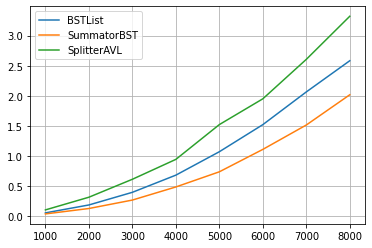

In [13]:
import time
from io import StringIO
from matplotlib import pyplot as plt

N, STEP = 8 * 10 ** 3, 10 ** 3

def timed(n, mode=0, tree=BSTree, n_iter=1):
    acc = float('inf')
    for _ in range(n_iter):
        tests = TestCases(n, mode=mode).stream()
        t0 = time.perf_counter()
        run(tree, input=tests, output=StringIO())
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

def draw(trees, n_iter=1):
    ns = list(range(STEP, N + STEP, STEP))
    for tree in trees:
        plt.plot(ns, [timed(n, mode=0, tree=tree, n_iter=n_iter) for n in ns], label=tree.__name__)
    plt.legend()
    plt.grid(True)
    plt.show()

draw([BSTList, SummatorBST, SplitterAVL])

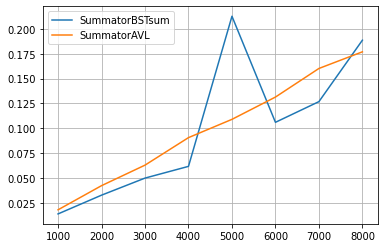

In [14]:
draw([SummatorBSTsum, SummatorAVL])